In [98]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Придумайте распределение, у которого конечны пер-
вые четыре момента, а пятое — нет. Это рапределение с плотностью 5 * (x ^ (-6)) * I([1, INF)).

In [99]:
class mystat(sts.rv_continuous):
    def _pdf(self, x):
        return 5 * (x ** (-6))
stat = mystat(a=1, name='stat')

Сгенерируйте выборку 𝑋1, ..., 𝑋𝑁 из этого распределения для 𝑁 = 10^4. 

In [100]:
samples = stat.rvs(size=10000)
N = np.size(samples)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой 𝑦-координатой).

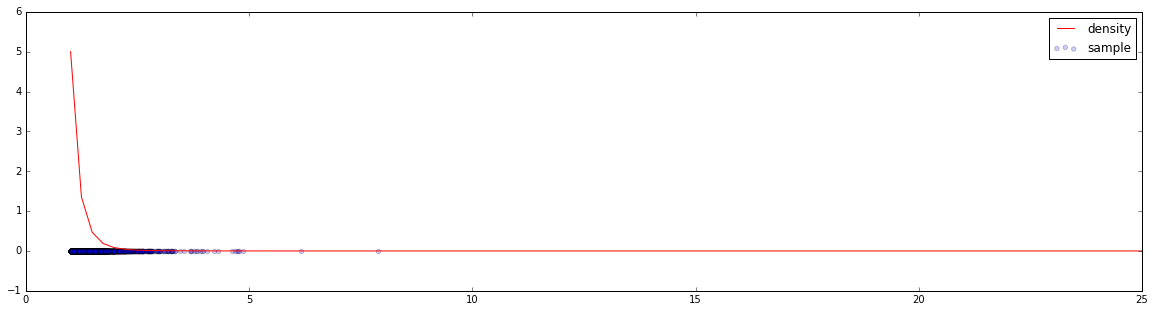

In [101]:
grid = np.linspace(1, 25, 100)
plt.figure(figsize=(20, 5))
plt.xlim([0, 25])
plt.scatter(samples, np.zeros(N), alpha=0.2, label='sample')
plt.plot(grid, stat.pdf(grid), color='red', label='density')
plt.legend()
plt.show()

Для всех 𝑛 <= 𝑁 посчитайте оценку 𝑆2 = 𝑆2(𝑋1, . . . , 𝑋𝑛) для дисперсии.

In [102]:
res = []
var = stat.var()
for n in range(1, N + 1):
    res.append(np.abs(np.var(samples[:n]) - var))

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от 𝑛.

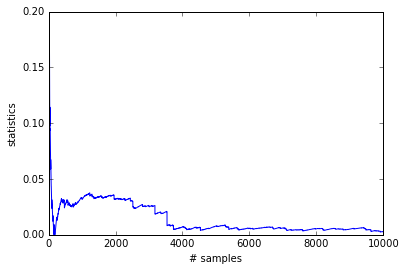

In [103]:
x = np.arange(N) + 1.
plt.xlabel("# samples")
plt.ylabel("statistics")
plt.ylim([0., 0.2])
plt.xlim([1., N])
plt.plot(x, res)
plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии.

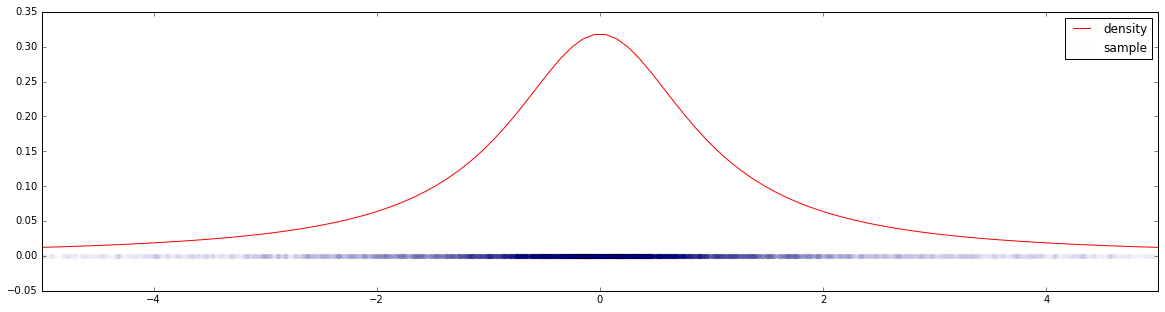

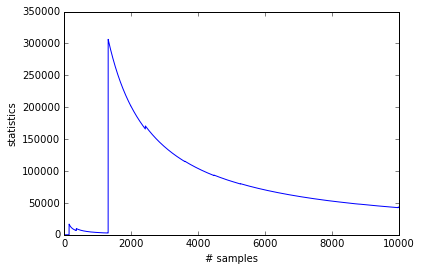

In [104]:
samples = sts.cauchy.rvs(size=10000)
N = np.size(samples)
grid = np.linspace(-5, 5, 100)
plt.figure(figsize=(20, 5))
plt.xlim([-5, 5])
plt.scatter(samples, np.zeros(N), alpha=0.01, label='sample')
plt.plot(grid, sts.cauchy.pdf(grid), color='red', label='density')
plt.legend()
plt.show()
res = []
var = stat.var()
for n in range(1, N + 1):
    res.append(np.var(samples[:n]))
x = np.arange(N) + 1.
plt.xlabel("# samples")
plt.ylabel("statistics")
#plt.ylim([0., 1])
#plt.xlim([1., N])
plt.plot(x, res)
plt.show()